In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, Binarizer
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('flightsData.csv')
df.set_index(['Day & Month'], inplace=True)
df.head()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,CANCELLED,AIR_TIME,DISTANCE,DAY_OF_WEEK
Day & Month,,,,,,,,
1-1-2015,AS,ANC,SEA,-11.0,0,169.0,1448,4
1-1-2015,AA,LAX,PBI,-8.0,0,263.0,2330,4
1-1-2015,US,SFO,CLT,-2.0,0,266.0,2296,4
1-1-2015,AA,LAX,MIA,-5.0,0,258.0,2342,4
1-1-2015,AS,SEA,ANC,-1.0,0,199.0,1448,4


In [1]:
df['AIRLINE']

NameError: name 'df' is not defined

In [33]:
df.shape

(5714008, 9)

In [3]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = df['DEPARTURE_DELAY'].groupby(df['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,count,max,mean,min
AIRLINE,,,,
VX,61248.0,644.0,8.993486,-24.0
HA,76041.0,1433.0,0.469918,-27.0
F9,90090.0,1112.0,13.303352,-46.0
NK,115193.0,836.0,15.883101,-37.0
AS,171439.0,963.0,1.718926,-82.0
US,194223.0,759.0,6.081000,-28.0
B6,262042.0,1006.0,11.442467,-31.0
MQ,278791.0,1544.0,9.967187,-36.0
UA,507762.0,1314.0,14.333056,-40.0


In [6]:
# colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
#           'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
# #___________________________________________________________________
# ax3 = sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size = 4, palette = colors,
#                     data=df, linewidth = 0.5,  jitter=True)
# plt.setp(ax3.get_xticklabels(), fontsize=14)
# plt.setp(ax3.get_yticklabels(), fontsize=14)
# ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
#                          for x in ax3.get_xticks()])
# plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
#            color='w', labelpad=20)
# ax3.yaxis.label.set_visible(False)
# #________________________
# plt.tight_layout(w_pad=3) 

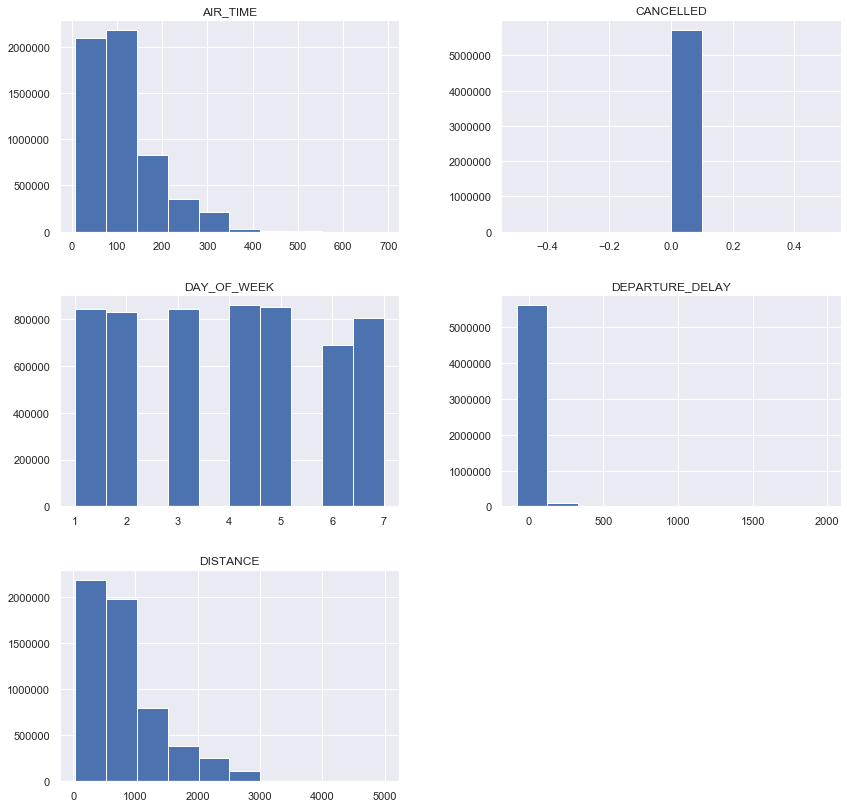

In [4]:
# lets look at our data to see what type of transformations we need to do
df.hist(figsize=(14,14));

In [3]:
# now we want to do a log transformation on the Delay feature because it is right skewed
df['LOG_DELAY'] = np.log(df['DEPARTURE_DELAY'] + 83)

In [4]:
numerical_features.head()

NameError: name 'numerical_features' is not defined

In [5]:
# alright we have out data frame, now we have to split into numerical and categorical data

In [6]:
numerical_features = df.select_dtypes(exclude='object')
categorical_features = df.select_dtypes('object')



cancelled = df['CANCELLED']

In [7]:
numerical_features.head()

,DEPARTURE_DELAY,CANCELLED,AIR_TIME,DISTANCE,DAY_OF_WEEK,LOG_DELAY
Day & Month,,,,,,
1-1-2015,-11.0,0,169.0,1448,4,4.276666
1-1-2015,-8.0,0,263.0,2330,4,4.317488
1-1-2015,-2.0,0,266.0,2296,4,4.394449
1-1-2015,-5.0,0,258.0,2342,4,4.356709
1-1-2015,-1.0,0,199.0,1448,4,4.406719


In [8]:
# now we have to drop the columns we do not want to scale
numerical_features = numerical_features.drop(columns=['CANCELLED','DAY_OF_WEEK', 'DEPARTURE_DELAY'])

In [9]:
# now we scale our data

scale = MinMaxScaler()
df_scaled = numerical_features
df_scaled[numerical_features.columns] = scale.fit_transform(numerical_features)
df_scaled.head()

,AIR_TIME,DISTANCE,LOG_DELAY
Day & Month,,,
1-1-2015,0.237189,0.286147,0.560082
1-1-2015,0.374817,0.464257,0.565428
1-1-2015,0.379209,0.457391,0.575507
1-1-2015,0.367496,0.466680,0.570564
1-1-2015,0.281113,0.286147,0.577114


In [10]:
# sweeeet...we are done with the numerical df for now.
# now we focus on the categorical df
# we want to have each airline as a feature of ours, so we use one hot encoder

ohc = OneHotEncoder(sparse=False)
ohc.fit(categorical_features[['AIRLINE']])
ohc_airlines = pd.DataFrame(ohc.transform(categorical_features[['AIRLINE']]))
ohc_airlines.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# first we have to set the index as the same as the df we will concatenate it to
ohc_airlines.set_index(df_scaled.index, inplace=True)

In [12]:
# lets see if it worked
ohc.categories_

[array(['AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA',
        'US', 'VX', 'WN'], dtype=object)]

In [13]:
# now lets put the categories as the feature names to make it easier to read

new_names = ohc.categories_[0]
ohc_airlines.columns = new_names
ohc_airlines.head()

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Day & Month,,,,,,,,,,,,,,
1-1-2015,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-1-2015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-1-2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1-1-2015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-1-2015,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_final = pd.concat([df_scaled, ohc_airlines], axis=1)
df_final.head()

,AIR_TIME,DISTANCE,LOG_DELAY,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Day & Month,,,,,,,,,,,,,,,,,
1-1-2015,0.237189,0.286147,0.560082,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-1-2015,0.374817,0.464257,0.565428,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-1-2015,0.379209,0.457391,0.575507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1-1-2015,0.367496,0.466680,0.570564,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-1-2015,0.281113,0.286147,0.577114,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# now we get to do the same thing for the day of the week!
ohc = OneHotEncoder(sparse=False)
ohc.fit(df[['DAY_OF_WEEK']])
ohc_days = pd.DataFrame(ohc.transform(df[['DAY_OF_WEEK']]))
ohc_days.head()

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
# again set the index
ohc_days.set_index(df.index, inplace=True)

In [17]:
# rename the features
ohc_days.rename(columns={0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}, inplace=True)

In [18]:
# how does it loook?
ohc_days.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Day & Month,,,,,,,
1-1-2015,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1-1-2015,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1-1-2015,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1-1-2015,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1-1-2015,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
# andddd concat
df_final2 = pd.concat([df_final, ohc_days], axis=1)
# df_final2.drop(columns='DAY_OF_WEEK', inplace=True)

In [20]:
df_final2.head()

,AIR_TIME,DISTANCE,LOG_DELAY,AA,AS,B6,DL,EV,F9,HA,...,US,VX,WN,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Day & Month,,,,,,,,,,,,,,,,,,,,,
1-1-2015,0.237189,0.286147,0.560082,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1-1-2015,0.374817,0.464257,0.565428,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1-1-2015,0.379209,0.457391,0.575507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1-1-2015,0.367496,0.466680,0.570564,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1-1-2015,0.281113,0.286147,0.577114,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
# for fun, we can do a heat map
# plt.figure(figsize=(16,16))
# sns.heatmap(df_final2.corr(), annot=True);
df_final2.head()

,AIR_TIME,DISTANCE,LOG_DELAY,AA,AS,B6,DL,EV,F9,HA,...,US,VX,WN,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Day & Month,,,,,,,,,,,,,,,,,,,,,
1-1-2015,0.237189,0.286147,0.560082,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1-1-2015,0.374817,0.464257,0.565428,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1-1-2015,0.379209,0.457391,0.575507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1-1-2015,0.367496,0.466680,0.570564,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1-1-2015,0.281113,0.286147,0.577114,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
# now lets start to model
y = df['DEPARTURE_DELAY']
X = df_final2

In [23]:
df_final2.head()

,AIR_TIME,DISTANCE,LOG_DELAY,AA,AS,B6,DL,EV,F9,HA,...,US,VX,WN,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Day & Month,,,,,,,,,,,,,,,,,,,,,
1-1-2015,0.237189,0.286147,0.560082,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1-1-2015,0.374817,0.464257,0.565428,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1-1-2015,0.379209,0.457391,0.575507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1-1-2015,0.367496,0.466680,0.570564,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1-1-2015,0.281113,0.286147,0.577114,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
X.head()

,AIR_TIME,DISTANCE,LOG_DELAY,AA,AS,B6,DL,EV,F9,HA,...,US,VX,WN,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Day & Month,,,,,,,,,,,,,,,,,,,,,
1-1-2015,0.237189,0.286147,0.560082,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1-1-2015,0.374817,0.464257,0.565428,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1-1-2015,0.379209,0.457391,0.575507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1-1-2015,0.367496,0.466680,0.570564,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1-1-2015,0.281113,0.286147,0.577114,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
formula = 'y ~' + '+'.join(list(X))
model = smf.ols(formula, data=df_final2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 1.918e+06
Date:                Thu, 03 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:20:39   Log-Likelihood:            -2.2649e+07
No. Observations:             5714008   AIC:                         4.530e+07
Df Residuals:                 5713985   BIC:                         4.530e+07
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.825e+11   5.12e+11     -0.942      0.346   -1.49e+12    5.21e+11
AIR_TIME       4.6652      0.304     15.360      0.000       4.070       5.260
DISTANCE      -5.8845      0.259    -22.687      0.000      -6.393      -5.376
LOG_DELAY   1076.5823      0.166   6469.809      0.000    1076.256    1076.908
AA          2.003e+11   5.01e+11      0.400      0.690   -7.82e+11    1.18e+12
AS          2.003e+11   5.01e+11      0.400      0.690   -7.82e+11    1.18e+12
B6          2.003e+11   5.01e+11      0.400      0.690   -7.82e+11    1.18e+12
DL          2.003e+11   5.01e+11      0.400      0.690   -7.82e+11    1.18e+12
EV          2.003e+11   5.01e+11      0.400      0.690   -7.82e+11    1.18e+12
F9          2.003e+11   5.01e+11      0.400      0.690   -7.82e+11    1.18e+12
HA          2.003e+11   5.01e+11      0.400      0.690   -7.82e+11    1.18e+12
MQ          2.003e+11   5.01e+11      0.400      0.690   -7.82e+11    1.18e+12
NK          2.003e+11   5.01e+11      0.400      0.690   -7.82e+11    1.18e+12
OO          2.003e+11   5.01e+11      0.400      0.690   -7.82e+11    1.18e+12
UA          2.003e+11   5.01e+11      0.400      0.690   -7.82e+11    1.18e+12
US          2.003e+11   5.01e+11      0.400      0.690   -7.82e+11    1.18e+12
VX          2.003e+11   5.01e+11      0.400      0.690   -7.82e+11    1.18e+12
WN          2.003e+11   5.01e+11      0.400      0.690   -7.82e+11    1.18e+12
Monday      2.821e+11   5.16e+11      0.547      0.584   -7.29e+11    1.29e+12
Tuesday     2.821e+11   5.16e+11      0.547      0.584   -7.29e+11    1.29e+12
Wednesday   2.821e+11   5.16e+11      0.547      0.584   -7.29e+11    1.29e+12
Thursday    2.821e+11   5.16e+11      0.547      0.584   -7.29e+11    1.29e+12
Friday      2.821e+11   5.16e+11      0.547      0.584   -7.29e+11    1.29e+12
Saturday    2.821e+11   5.16e+11      0.547      0.584   -7.29e+11    1.29e+12
Sunday      2.821e+11   5.16e+11      0.547      0.584   -7.29e+11    1.29e+12
==============================================================================
Omnibus:                 13868719.078   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     419976547346.755
Skew:                          25.158   Prob(JB):                         0.00
Kurtosis:                    1330.198   Cond. No.                     4.97e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.85e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
# cool not a bad r**2 value of .881
# now lets do a train, test split!

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [28]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred = regressor.predict(X_test)

In [30]:
y_hat_train = regressor.predict(X_train)

In [31]:
df_y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
df_y_act = pd.DataFrame(y_test.values, columns=['Actual'])

results = pd.concat([df_y_act, df_y_pred],axis=1)
results.head()

,Actual,Predicted
0,6.0,11.179382
1,1.0,1.531738
2,8.0,11.190063
3,0.0,0.662109
4,-6.0,-9.507385


In [86]:
print('rsquared =', r2_score(y_test, y_pred))

rsquared = 0.8814400222124144


In [87]:
print('rsquared =', r2_score(y_train, y_hat_train))

rsquared = 0.8804235475856618


In [88]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
rms

12.688817323181675

In [ ]:
numerical_features.fillna(.1, inplace=True)
null_columns = numerical_features.columns[numerical_features.isnull().any()]
numerical_features[null_columns].isnull().sum()

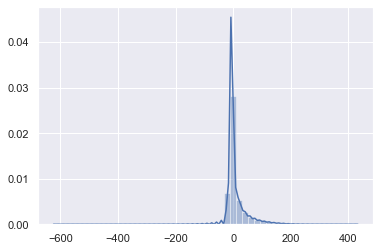

In [89]:
sns.distplot(y_pred)

In [32]:
y_pred

array([11.17938232,  1.53173828, 11.19006348, ..., -4.52801514,
       25.46929932, -1.3324585 ])